# Análise Exploratória dos Dados

    

## Objetivos

* Explorar features ou características para prever o preço de um carro
* Analisar padrões e executar uma análise estatística descritiva
* Agrupar dados baseados em parâmetros identificados e criar pivot tables
* Identificar o efeito de atributos independentes no preço do carro


<h2>Tabela de Conteúdo</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#import_data">Importar os Modulos e Dados</a></li>
    <li><a href="#pattern_visualization">Analisar Padrões em Features Individuais Utilizando Visualização</a></li>
    <li><a href="#discriptive_statistics">Análise Estatística Descritiva</a></li>
    <li><a href="#basic_grouping">Básico de Agrupamento</a></li>
    <li><a href="#correlation_causation">Correlação e Causalidade</a></li>
</ol>

</div>
 
<hr>


<h3>What are the main characteristics that have the most impact on the car price?</h3>


<h2 id="import_data">1. Importar os Modulos e Dados</h2>


<h4>Configuração</h4>


Importar as bibliotecas: 


In [1]:
#! pio install pandas
#! pip install numpy
#! pip install scipy
#!  pip install seaborn

In [2]:
import pandas as pd
import numpy as np

Este dataset está hospedado na IBM Cloud. Clique <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv">AQUI</a> para baixar.


Carregamos os dados e armazenamos em um dataframe `df`:


In [3]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2 id="pattern_visualization">2. Analisar Padrões em Features Individuais Utilizando Visualização</h2>


Para instalar o Seaborn usamos o pip, o gerenciador de pacotes do Python.

Importamos os pacotes para visualização "Matplotlib" e "Seaborn". Utilizamos `%matplotlib inline` para reproduzir os gráficos no Jupyter notebook.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### Como escolher o método de visualização correto?
Quando visualizamos variáveis individualmente, é importante primeiro entender qual o tipo de variável que estaremos utilizando. Isso nos ajuda a encontrar o método correto de visualizar aquela variável.


In [5]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


Por exemplo, podemos calcular a correlação entre variáveis do tipo "int64" ou "float64" utilizando o método `corr`:


Os elementos da diagonal são sempre um


In [6]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


## Variáveis Numéricas Contínuas:

Variáveis numéricas continuas são variáveis que podem conter qualquer valor dentro de uma faixa. Elas podem ser do tipo "int64" ou "float64". Uma boa maneira de visualizar essas variáveis é utilizar gráficos de dispersão com linhas ajustadas.

Para começar identificar a relação (linear) entre uma variável individual e o preço, podemos utilizar "regplot" que plota um gráfico de dispersão em conjunto com a linha da regressão dos dados. Ele será util para visualizarmos mais tarde para visualizar o ajuste do modelo de regressão linear.


Vamos verificar alguns exemplos de diferentes relações lineares:


### Relação Linear Positiva

Vamos verificar o gráfico de dispersão entre "engine-size" e "price".


(0.0, 53334.89335118525)

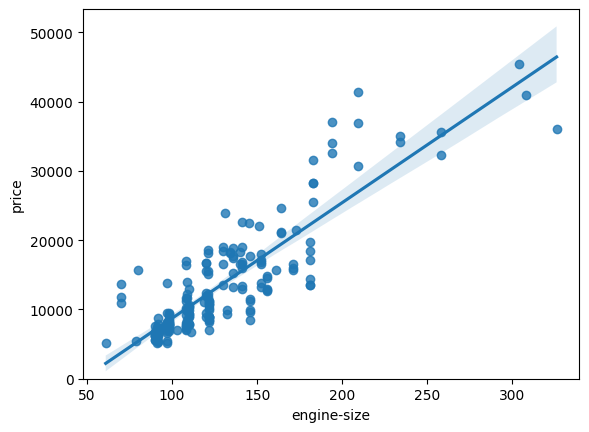

In [7]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>À medida que engine-size aumenta, price também aumenta: isso indica uma correlação positiva direta entre essas duas variáveis. O tamanho do motor parece ser um ótimo preditor do preço pois a linha de regressão é quase uma linha diagonal perfeita.</p>


Podemos examinar a correlação entre 'engine-size' e 'price' e vemos que o valor é aproximadamente 0.87.


In [8]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


### Relação Linear Negativa

'Highway-MPG' é uma potencial variavel preditora para o preço. Vamos ver o grafíco de disperção entre "highway-mpg" e "price".

<Axes: xlabel='highway-mpg', ylabel='price'>

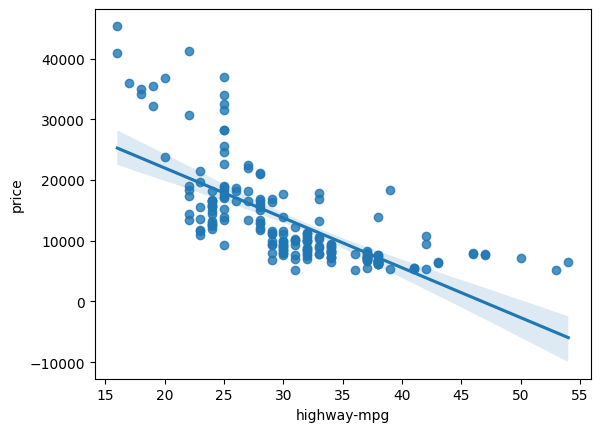

In [9]:
sns.regplot(x="highway-mpg", y="price", data=df)

<p>À medida que highway-mpg aumenta, price diminui: isso indica um relacionamento inverso/negativo entre essas duas variáveis. Milhas per gallons na estrada pode ser um preditor em potencial para o preço.</p>


Podemos examinar a correlação entre 'highway-mpg' e 'price' e vemos que o valor é aproximadamente -0.704.


In [10]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### Relação Linear Fraca

Vamos verificar se "peak-rpm" é uma variável preditora para "price".

<Axes: xlabel='peak-rpm', ylabel='price'>

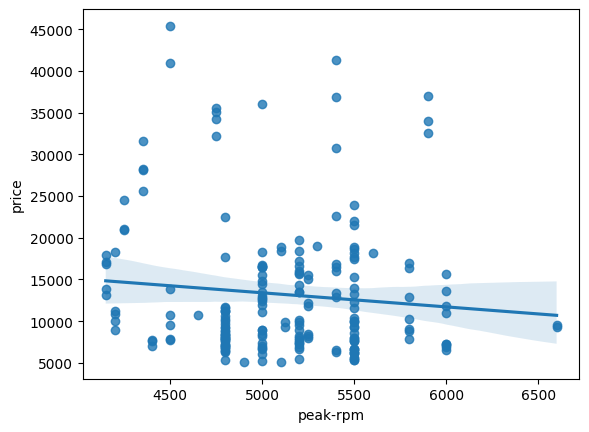

In [11]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Pico de rotação por minuto não parece ser um bom preditor para o preço pois a linha de regressão está quase na horizontal. Além disso, os pontos do gráfico estão muito espalhados e longe da linha ajustada, mostrando uma alta variância. Portanto, não é uma variável confiável.</p>


Podemos examinar a correlação entre 'peak-rpm' e 'price' e vemos que o valor é aproximadamente -0.101616.


In [12]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Vamos verificar se "stroke" é uma variável preditora para "price".


In [13]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


Existe uma correlação fraca entre a variável 'stroke' e 'price' então essa regressão não funcionará bem. Podemos verificar isso utilizando a função "regplot" para demonstrar.

<Axes: xlabel='stroke', ylabel='price'>

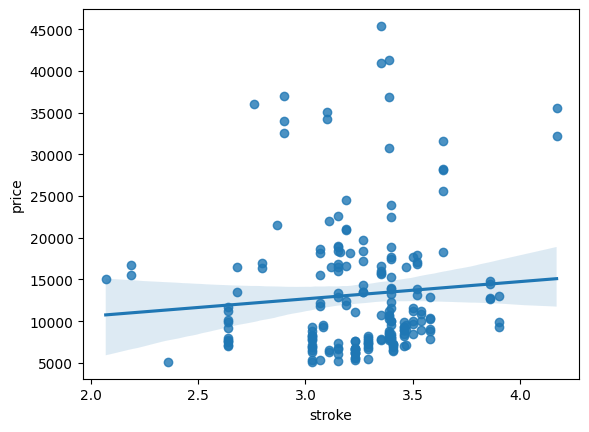

In [14]:
sns.regplot(x='stroke',y='price',data=df)

<h3>Variáveis Categóricas</h3>

<p>Essas variáveis descrevem uma característica sobre um dado, e são selecionados de um pequeno grupo de categorias. As variáveis categoricas possuem o tipo "object" ou "int64". Uma boa maneira de visualizar variáveis categóricas é utilizar um diagramas de caixa (boxplots).</p>


Vamos verificar o relacionamento entre "body-style" e "price".


<Axes: xlabel='body-style', ylabel='price'>

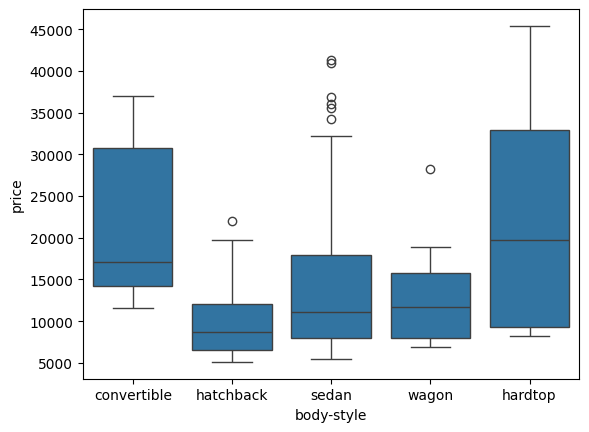

In [15]:
sns.boxplot(x="body-style", y="price", data=df)

<p>Vemos que a distribuição de preço entre diferentes categorias de carrocerias tem uma sobreposição siginificante, então body-style não sera um bom preditor para o preço. Vamos examinar "engine-location" e "price":</p>


<Axes: xlabel='engine-location', ylabel='price'>

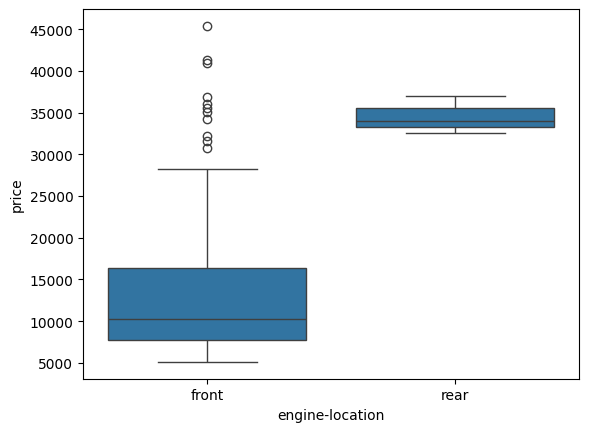

In [16]:
sns.boxplot(x="engine-location", y="price", data=df)

<p>Aqui vemos que a distribuição de preço entre essas duas categorias de localização do motor, frontal e traseira, são distintas o suficiente para utilizar 'engine-location' como um potencial preditor para o preço.</p>


Vamos examinar "drive-wheels" e "price".


<Axes: xlabel='drive-wheels', ylabel='price'>

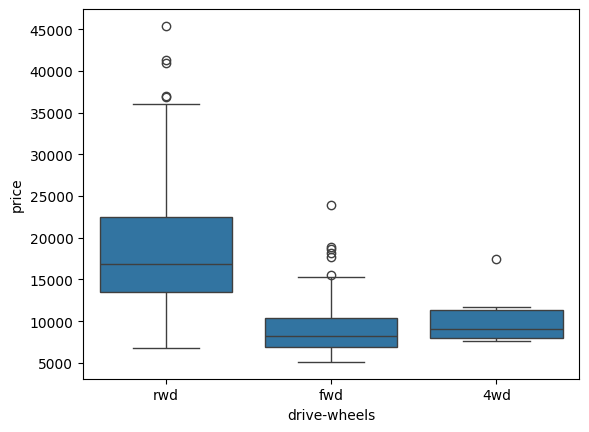

In [17]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Aqui vemos que a distribuição de preço entre as diferentes categorias de tração difere. Então 'drive-wheels' pode ser um potencial preditor do preço.


<h2 id="discriptive_statistics">3. Análise Estatística Descritiva</h2>


Primeiro vamos dar uma olhada nas variáveis utilizando métodos descritivos.

A função **describe** calcula automaticamente estatísticas basicas para todas variáveis contínuas. Qualquer valor `NaN` são ignorados automaticamente nessa estatística.

Isso nos mostrará:
* a contagem daquela variável
* a média
* o desvio padrão (std) 
* o valor mínimo
* o IQR (Faixa Interquartile: 25%, 50% and 75%)
* o valor máximo


Aplicamos o método "describe" a seguir:

In [18]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


A configuração padrão do "describe" é ignorar variaveis do tipo object. Podemos aplicar o método "describe" em variáveis do tipo 'object' assim:


In [19]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


<h3>Contagem de Valores</h3>


Contagem de Valores (value counts) é uma boa maneira para entender quantas unidades de cada característica/variavel nós temos. Podemos aplicar o método "value_counts" na coluna "drive-wheels". Não esqueça que o método "value_counts" só funciona com pandas series, e não pandas dataframes. Para ajustar isto, apenas incluimos um colchetes `df['drive-wheels']`, e não dois colchetes `df[['drive-wheels']]`.


In [20]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

Podemos converter as series em um dataframe desta maneira:

In [21]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Vamos repetir os passos acima e salvar o resultado em um dataframe "drive_wheels_counts" e renomear a coluna 'drive-wheels' para 'value_counts'.


In [22]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Agora vamos renomear o index para 'drive-wheels':


In [23]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Podemos repetir o processo acima para a variável 'engine-location'.


In [24]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


Apos examinar a contagem de valores da localização do motor, vemos que a posição do motor pode não ser uma boa variável preditora para preço. Isso é porque apenas três carros possuem motor traseiro e 198 carros possuem motor frontal, então o resultado será enviesado. Por isso não podemos tirar nenhuma conclusão sobre posição do motor.


<h2 id="basic_grouping">4. Básico de Agrupamento</h2>

O método "groupby" agrupa dados por diferentes categorias. Os dados são agrupados baseado em diversas variáveis, e a análise é realizada individualmente nos grupos.

Por exemplo, vamos agrupar pela variável "drive-wheels". Vemos que existem 3 categorias diferentes de tração.


In [25]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Se quisermos saber, em média, qual tipo de tração é mais valiosa, podemos agrupar "drive-wheels" e depois realizar a média em cada grupo.

Selecionamos as colunas 'drive-wheels', 'body-style' e 'price', e atribuimos os valores na variável "df_group_one".


In [26]:
df_group_one = df[['drive-wheels','price']]

Podemos calcular o preço médio para cada categoria diferente de dado.

In [27]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


Pelos nossos dados, tração traseira parece ser, em média, os mais caros, enquanto tração nas 4 rodas e tração dianteira são aproximadamente as mesmas em preço.

Podemos agrupar também por múltiplas variáveis. Por exmplo, vamos agrupar por ambos 'drive-wheels' e 'body-style'. Isso irá agrupar o dataframe pela combinação única entre 'drive-wheels' e 'body-style'. Vamos armazenar os resultados na variável 'grouped_test1'.


In [28]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Esse agrupamento de dados é muito mais facil de visualizar quando é utilizado em um pivot table. Um pivot table é como uma planilha do Excel, onde uma variável fica na coluna e outra variavel fica na linha. Podemos converter o dataframe em um pivot table utilizando o método "pivot" para criar um pivot table a partir dos grupos.

Nesse caso, vamos deixar a variavel drive-wheels como as linhas da tabela, e girar body-style para tornar as colunas da tabela:

In [29]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Frequentemente, não haverá dados para algumas células da tabela. Podemos preencher esses dados vazios com o valor 0, porém qualquer outro valor também pode ser utilizado

In [30]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Utilizaremos 'body-style' para verificarmos o preço em cada categoria.

In [31]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<h4>Variáveis: 'Drive-Wheels' e 'Body-Style' vs. 'Price'</h4>


Vamos utilizar um mapa de calor para visualizar o relacionamento entre Carroceria e Preço.

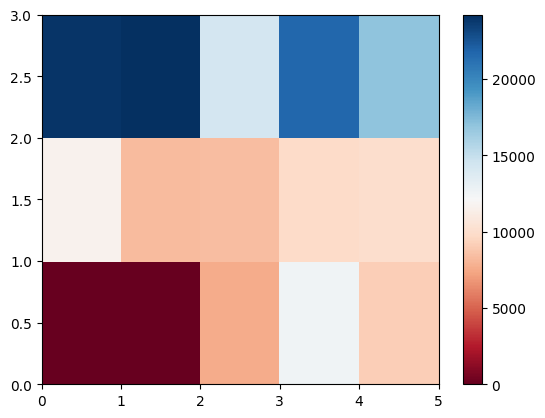

In [32]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

Sem os rótulos apropriados é mais difícil de interpretar os dados de um gráfico, portanto vamos adicionar rótulos aos eixos X e Y.

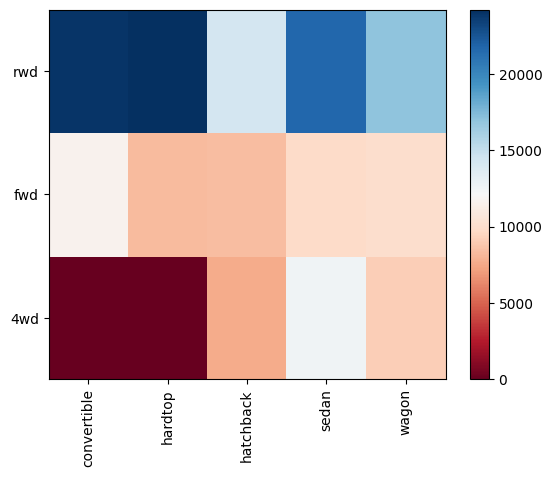

In [33]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Visualização é muito importante em ciencia de dados, e os pacotes de visualização em Python fornecem uma exelente liberdade.

O pergunta mais importante que desejamos responder nesse módulo é "Qual é a maior característica que mais impacta no preço de um carro?".

Para medir a importância de uma característica, vamos analisar a correlação dessas variáveis com o preço do carro. Em outras palavras, como o preço do carro depende dessas variáveis?

<h2 id="correlation_causation">5. Correlação e Causalidade</h2>

**Correlação**: a medida da interdependência entre variáveis

**Causalidade**: o relacionamento entre causa e o efeito entre duas variáveis.

É importante saber a diferença entre esses dois. Correlação não implica em causa. Determinar correlação é muito mais simples que determinar causalidade poir causalidade pode necessitar de experimentos independentes.


**Correlação de Pearson**
A Correlação de Pearson mede a dependência linear entre duas variáveis X e Y.
O coeficiente resultante é um valor entre -1 e 1, onde:
* **1**: Correlação linear positiva perfeita.
* **0**: Sem correlação linear, as duas variáveis não afetam uma à outra.
* **-1**: Correlação linear negativa perfeita


Correlação de Pearson é o método padrão da função `corr`. Como antes, podemos calcular a Correlação de Pearson das variaveis do tipo 'int64' ou 'float64'

In [34]:
df[['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price','city-L/100km']].corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300


As vezes gostaríamos de saber a significância da correlação estimada. 

**P-value**
O que é esse P-value? O P-value é a probabilidade da correlação entre essas duas variáveis é estatisticamente significativa. Normalmente, escolhemos um nível de significância de  0.05, o que significa que estamos 95% confiantes que a correlação entre as variaveis é significativa.

Por convenção, quando:
* p-value is < 0.001: dizemos que há uma forte evidência que a correlação é significativa.
* o p-value is < 0.05: há uma moderada evidencia que a correlação é significativa.
* o p-value is < 0.1: há uma fraca evidencia que a correlação é significativa.
* o p-value is > 0.1: não há evidence que a correlação é significativa.

Podemos obter essa informação utilizando o módulo `stats` da biblioteca `scipy`.


In [35]:
from scipy import stats

### Wheel-Base vs. Price

Vamos calcular o Coeficiente de Correlação Pearson e  P-value de 'wheel-base' e 'price'. 

In [36]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("O Coeficiente da Correlação Pearson é", pearson_coef, "com P-value de P =", p_value)

O Coeficiente da Correlação Pearson é 0.5846418222655081 com P-value de P = 8.076488270732947e-20


#### Conclusão:
Como o p-value é < 0.001, a correlação entre 'wheel-base' e 'price' é estatisticamente significativa, porém o relacionamento linear não é muito forte (~0.585).


### Horsepower vs. Price

Vamos calcular o Coeficiente de Correlação Pearson e P-value de 'horsepower' e 'price'.

In [37]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("O Coeficiente da Correlação Pearson é", pearson_coef, "com P-value de P =", p_value)

O Coeficiente da Correlação Pearson é 0.809574567003656 com P-value de P = 6.369057428259571e-48


#### Conclusão:

Como o p-value é < 0.001, a correlação entre 'horsepower' e 'price' é estatisticamente significativa, e o relacionamento linear é forte (~0.809, perto de 1).


### Length vs. Price

Vamos calcular o Coeficiente de Correlação Pearson e P-value de 'length' and 'price'.

In [38]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("O Coeficiente da Correlação Pearson é", pearson_coef, "com P-value de P =", p_value)

O Coeficiente da Correlação Pearson é 0.690628380448364 com P-value de P = 8.016477466158771e-30


#### Conclusion:
Como o p-value é < 0.001, a correlação entre 'length' e 'price' é estatisticamente significativa, e o relacionamento linear é moderado para forte (~0.691).


<h3>Width vs. Price</h3>


Vamos calcular o Coeficiente de Correlação Pearson e P-value de 'width' e 'price':

In [39]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("O Coeficiente da Correlação Pearson é", pearson_coef, "com P-value de P =", p_value)

O Coeficiente da Correlação Pearson é 0.7512653440522674 com P-value de P = 9.20033551048134e-38


#### Conclusão:
Como o p-value é < 0.001, a correlação entre 'width' e 'price' é estatisticamente significativa, e o relacionamento linear é forte (~0.751).

### Curb-Weight vs. Price


Vamos calcular o Coeficiente de Correlação Pearson e P-value de 'curb-weight' and 'price':

In [40]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("O Coeficiente da Correlação Pearson é", pearson_coef, "com P-value de P =", p_value)

O Coeficiente da Correlação Pearson é 0.8344145257702845 com P-value de P = 2.1895772388939584e-53


#### Conclusão:
Como o p-value é < 0.001, a correlação entre 'curb-weight' e 'price' é estatisticamente significativa, e o relacionamento linear é forte (~0.834).

### Engine-Size vs. Price

Vamos calcular o Coeficiente de Correlação Pearson e P-value de 'engine-size' and 'price':

In [41]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("O Coeficiente da Correlação Pearson é", pearson_coef, "com P-value de P =", p_value)

O Coeficiente da Correlação Pearson é 0.8723351674455185 com P-value de P = 9.265491622198827e-64


#### Conclusion:
Como o p-value é < 0.001, a correlação entre 'engine-size' e 'price' é estatisticamente significativa, e o relacionamento é muito forte (~0.872).

### Bore vs. Price

Vamos calcular o Coeficiente de Correlação Pearson e P-value de 'bore' and 'price':

In [42]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("O Coeficiente da Correlação Pearson é", pearson_coef, "com P-value de P =", p_value)

O Coeficiente da Correlação Pearson é 0.5431553832626603 com P-value de P = 8.049189483935246e-17


#### Conclusão:
Como o p-value é < 0.001, a correlação entre 'bore' e 'price' é estatisticamente significativa, porém o relacionamento é apenas moderado (~0.521).

Podemos reproduzir os mesmos processos para cada 'city-mpg' e 'highway-mpg':

### City-mpg vs. Price

In [43]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("O Coeficiente da Correlação Pearson é", pearson_coef, "com P-value de P =", p_value)

O Coeficiente da Correlação Pearson é -0.6865710067844679 com P-value de P = 2.3211320655674997e-29


#### Conclusão:
Como o p-value é < 0.001, a correlação entre 'city-mpg' e 'price' é estatisticamente significativa, e o coeficiente de aproximadamente -0.687 mostra que o relacionamento é negativo e um pouco forte.

<h3>Highway-mpg vs. Price</h3>


In [44]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("O Coeficiente da Correlação Pearson é", pearson_coef, "com P-value de P =", p_value)

O Coeficiente da Correlação Pearson é -0.7046922650589529 com P-value de P = 1.749547114447669e-31


#### Conclusion:
Como o p-value é < 0.001, a correlação entre 'highway-mpg' e 'price' é estatisticamente significativa, e o coeficiente de aproximadamente -0.705 mostra que o relacionamento é negativo e pouco forte.

### Conclusão: Variáveis Importantes

Agora temos uma idéia melhor de como são os nossos dados e quais variáveis são mais importantes para serem levadas em consideração para prever o valor do carro.
Listamos abaixo as seguintes variáveis:

Variáveis numéricas contínuas:
* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City-mpg
* Highway-mpg
* Wheel-base
* Bore
    
Variáveis Categóricas:
* Drive-wheels